In [101]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [102]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [103]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [104]:
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 10000,train_size = 60000, random_state = 15)

In [105]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)


Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


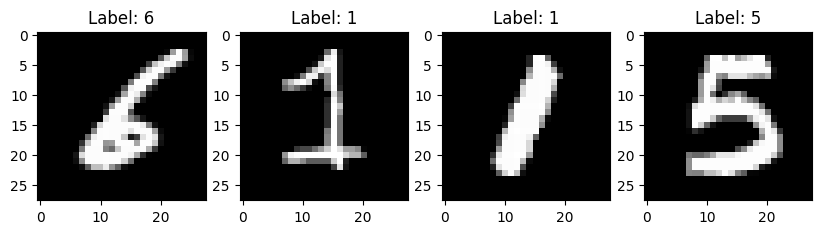

In [159]:
# Создаем subplot для 4 изображений
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for i in range(4):
    axes[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
    axes[i].set_title(f'Label: {y_train[i]}')  # Добавляем метку как заголовок

plt.show()


In [107]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)


Shape of transformed X train: (60000, 784)


In [108]:
# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]


Shape of transformed y train: (60000, 10)


In [109]:
from keras.models import Sequential
from keras.layers import Dense

In [110]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем первый скрытый слой
model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
model.add(Dense(units=100, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=num_classes, activation='softmax'))
# 5. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
# вывод информации об архитектуре модели
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [112]:
# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2517 - loss: 2.2636 - val_accuracy: 0.5822 - val_loss: 1.9925
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.6028 - loss: 1.8278 - val_accuracy: 0.7020 - val_loss: 1.2828
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7341 - loss: 1.1469 - val_accuracy: 0.7930 - val_loss: 0.8675
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8049 - loss: 0.8009 - val_accuracy: 0.8337 - val_loss: 0.6765
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8362 - loss: 0.6381 - val_accuracy: 0.8537 - val_loss: 0.5671
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8607 - loss: 0.5364 - val_accuracy: 0.8643 - val_loss: 0.5022
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8715 - loss: 0.4791 - val_accuracy: 0.8753 - val_loss: 0.4607
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8826 - loss: 0.4328

In [160]:
scores=model.evaluate(X_test,y_test)
print('Lossontestdata:',scores[0])
print('Accuracyontestdata:',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9152 - loss: 0.3057
Lossontestdata: 0.3149861991405487
Accuracyontestdata: 0.913100004196167


In [113]:
# Пункт 6. Однослойная ИНС
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1 = Sequential()
model_1.add(Dense(units=num_classes,input_dim=num_pixels, activation='softmax'))
# 2. компилируем модель
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [114]:
print("Архитектура нейронной сети:")
model_1.summary()

Архитектура нейронной сети:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
# Обучаем модель
history = model_1.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7106 - loss: 1.1677 - val_accuracy: 0.8667 - val_loss: 0.5285
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8719 - loss: 0.4933 - val_accuracy: 0.8805 - val_loss: 0.4439
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8886 - loss: 0.4152 - val_accuracy: 0.8880 - val_loss: 0.4078
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8946 - loss: 0.3877 - val_accuracy: 0.8903 - val_loss: 0.3882
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8988 - loss: 0.3700 - val_accuracy: 0.8967 - val_loss: 0.3736
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8987 - loss: 0.3613 - val_accuracy: 0.8973 - val_loss: 0.3630
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9038 - loss: 0.3461 - val_accuracy: 0.9002 - val_loss: 0.3560
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9073 - loss: 0.3322 - 

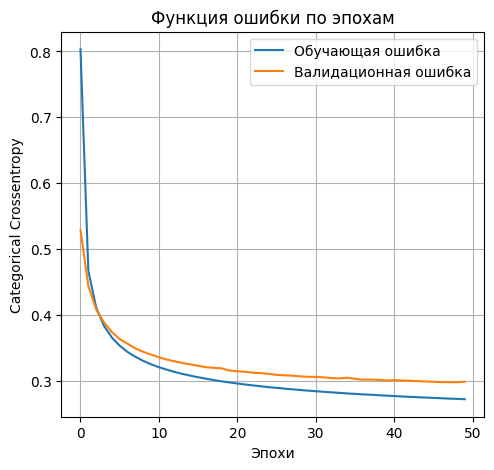

In [116]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучающая ошибка')
plt.plot(history.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [117]:
scores=model_1.evaluate(X_test,y_test)
print('Lossontestdata:',scores[0])
print('Accuracyontestdata:',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2666
Lossontestdata: 0.2741525173187256
Accuracyontestdata: 0.928600013256073


In [118]:
#Пункт 8
model_2l_100 = Sequential()
model_2l_100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model_2l_100.add(Dense(units=num_classes, activation='softmax'))
# 2. компилируем модель
model_2l_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [119]:
print("Архитектура нейронной сети:")
model_2l_100.summary()

Архитектура нейронной сети:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
# Обучаем модель
history_2l_100 = model_2l_100.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5431 - loss: 1.8730 - val_accuracy: 0.8193 - val_loss: 0.9612
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8325 - loss: 0.8374 - val_accuracy: 0.8562 - val_loss: 0.6289
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8661 - loss: 0.5818 - val_accuracy: 0.8730 - val_loss: 0.5130
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8795 - loss: 0.4818 - val_accuracy: 0.8825 - val_loss: 0.4548
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8853 - loss: 0.4311 - val_accuracy: 0.8900 - val_loss: 0.4174
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8964 - loss: 0.3925 - val_accuracy: 0.8943 - val_loss: 0.3931
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8989 - loss: 0.3714 - val_accuracy: 0.8983 - val_loss: 0.3744
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9005 - loss: 0.3600 - 

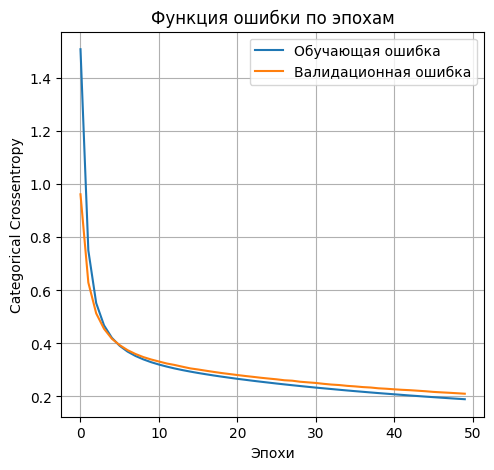

In [121]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2l_100.history['loss'], label='Обучающая ошибка')
plt.plot(history_2l_100.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [122]:
scores_2l_100=model_2l_100.evaluate(X_test,y_test)
print('Lossontestdata:',scores_2l_100[0])
print('Accuracyontestdata:',scores_2l_100[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9482 - loss: 0.1875
Lossontestdata: 0.19283892214298248
Accuracyontestdata: 0.9462000131607056


In [123]:
#Пункт 8
model_2l_300 = Sequential()
model_2l_300.add(Dense(units=300,input_dim=num_pixels, activation='sigmoid'))
model_2l_300.add(Dense(units=num_classes, activation='softmax'))
# 2. компилируем модель
model_2l_300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [124]:
print("Архитектура нейронной сети:")
model_2l_300.summary()

Архитектура нейронной сети:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
# Обучаем модель
history_2l_300 = model_2l_300.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5804 - loss: 1.7583 - val_accuracy: 0.8300 - val_loss: 0.8481
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8406 - loss: 0.7464 - val_accuracy: 0.8615 - val_loss: 0.5755
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8697 - loss: 0.5313 - val_accuracy: 0.8772 - val_loss: 0.4808
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8800 - loss: 0.4584 - val_accuracy: 0.8845 - val_loss: 0.4344
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8880 - loss: 0.4133 - val_accuracy: 0.8873 - val_loss: 0.4070
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8926 - loss: 0.3830 - val_accuracy: 0.8932 - val_loss: 0.3855
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8962 - loss: 0.3680 - val_accuracy: 0.8960 - val_loss: 0.3718
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8993 - loss: 0.3526 -

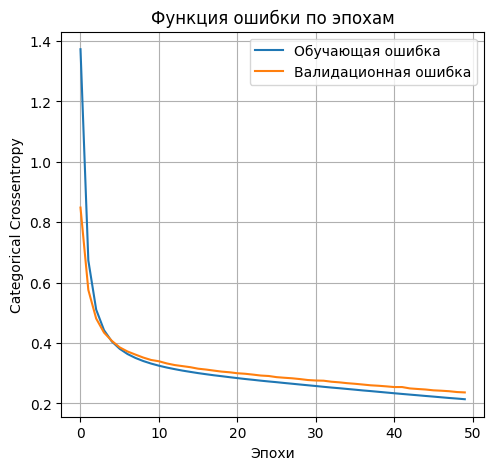

In [126]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2l_300.history['loss'], label='Обучающая ошибка')
plt.plot(history_2l_300.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [127]:
scores_2l_300=model_2l_300.evaluate(X_test,y_test)
print('Lossontestdata:',scores_2l_300[0])
print('Accuracyontestdata:',scores_2l_300[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9437 - loss: 0.2113
Lossontestdata: 0.2168053537607193
Accuracyontestdata: 0.9412000179290771


In [128]:
#Пункт 8
model_2l_500 = Sequential()
model_2l_500.add(Dense(units=500,input_dim=num_pixels, activation='sigmoid'))
model_2l_500.add(Dense(units=num_classes, activation='softmax'))
# 2. компилируем модель
model_2l_500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [129]:
print("Архитектура нейронной сети:")
model_2l_500.summary()

Архитектура нейронной сети:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# Обучаем модель
history_2l_500 = model_2l_500.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5580 - loss: 1.7493 - val_accuracy: 0.8328 - val_loss: 0.8208
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8438 - loss: 0.7269 - val_accuracy: 0.8607 - val_loss: 0.5631
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8707 - loss: 0.5200 - val_accuracy: 0.8755 - val_loss: 0.4721
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8816 - loss: 0.4488 - val_accuracy: 0.8838 - val_loss: 0.4282
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8907 - loss: 0.4021 - val_accuracy: 0.8875 - val_loss: 0.4031
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8906 - loss: 0.3913 - val_accuracy: 0.8925 - val_loss: 0.3831
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8976 - loss: 0.3632 - val_accuracy: 0.8953 - val_loss: 0.3700
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8991 - loss: 0.352

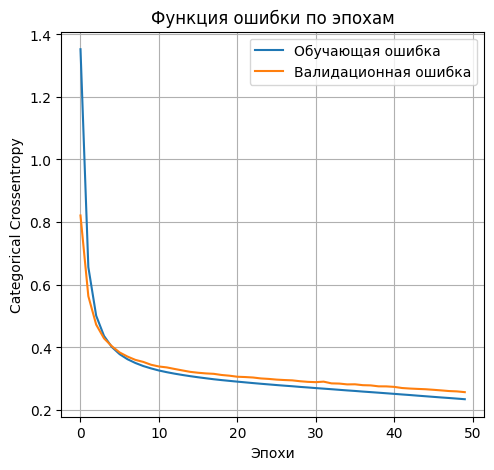

In [131]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2l_500.history['loss'], label='Обучающая ошибка')
plt.plot(history_2l_500.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [132]:
scores_2l_500=model_2l_500.evaluate(X_test,y_test)
print('Lossontestdata:',scores_2l_500[0])
print('Accuracyontestdata:',scores_2l_500[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9396 - loss: 0.2295
Lossontestdata: 0.23596525192260742
Accuracyontestdata: 0.9369999766349792


Как мы видим, лучшая метрика получилась равной **0.9465000033378601** при архитектуре со 100 нейронами в скрытом слое, поэтому для дальнейших пунктов используем ее.

In [133]:
#9 пункт
model_3l_100_50 = Sequential()
model_3l_100_50.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_3l_100_50.add(Dense(units=50, activation='sigmoid'))
model_3l_100_50.add(Dense(units=num_classes, activation='softmax'))

model_3l_100_50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [134]:
print("Архитектура нейронной сети:")
model_3l_100_50.summary()

Архитектура нейронной сети:


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
# Обучаем модель
history_3l_100_50 = model_3l_100_50.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2333 - loss: 2.2703 - val_accuracy: 0.5425 - val_loss: 2.1027
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6070 - loss: 1.9965 - val_accuracy: 0.6730 - val_loss: 1.5702
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6855 - loss: 1.4374 - val_accuracy: 0.7502 - val_loss: 1.0896
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7654 - loss: 1.0119 - val_accuracy: 0.8085 - val_loss: 0.8186
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8195 - loss: 0.7722 - val_accuracy: 0.8425 - val_loss: 0.6650
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8454 - loss: 0.6291 - val_accuracy: 0.8573 - val_loss: 0.5729
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8600 - loss: 0.5463 - val_accuracy: 0.8703 - val_loss: 0.5112
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8730 - loss: 0.4905 -

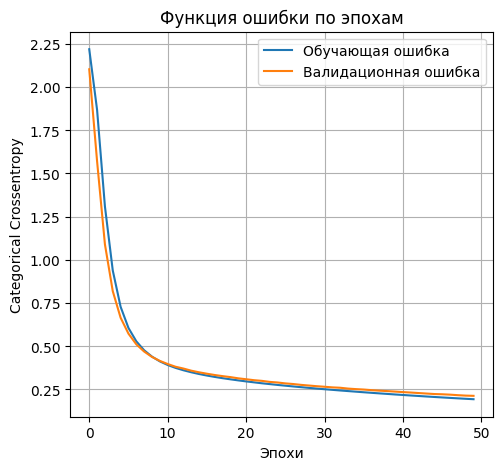

In [136]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_3l_100_50.history['loss'], label='Обучающая ошибка')
plt.plot(history_3l_100_50.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [137]:
scores_3l_100_50=model_3l_100_50.evaluate(X_test,y_test)
print('Lossontestdata:',scores_3l_100_50[0])
print('Accuracyontestdata:',scores_3l_100_50[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9459 - loss: 0.1914
Lossontestdata: 0.1960301399230957
Accuracyontestdata: 0.9444000124931335


In [138]:
#9 пункт
model_3l_100_100 = Sequential()
model_3l_100_100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))
model_3l_100_100.add(Dense(units=100, activation='sigmoid'))
model_3l_100_100.add(Dense(units=num_classes, activation='softmax'))

model_3l_100_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [139]:
print("Архитектура нейронной сети:")
model_3l_100_100.summary()


Архитектура нейронной сети:


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Обучаем модель
history_3l_100_100 = model_3l_100_100.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2194 - loss: 2.2793 - val_accuracy: 0.4952 - val_loss: 2.0919
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5646 - loss: 1.9686 - val_accuracy: 0.6503 - val_loss: 1.4959
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7034 - loss: 1.3398 - val_accuracy: 0.7640 - val_loss: 0.9908
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7881 - loss: 0.9110 - val_accuracy: 0.8203 - val_loss: 0.7452
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8294 - loss: 0.6966 - val_accuracy: 0.8447 - val_loss: 0.6150
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8519 - loss: 0.5810 - val_accuracy: 0.8595 - val_loss: 0.5386
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8672 - loss: 0.5061 - val_accuracy: 0.8737 - val_loss: 0.4873
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8786 - loss: 0.4580

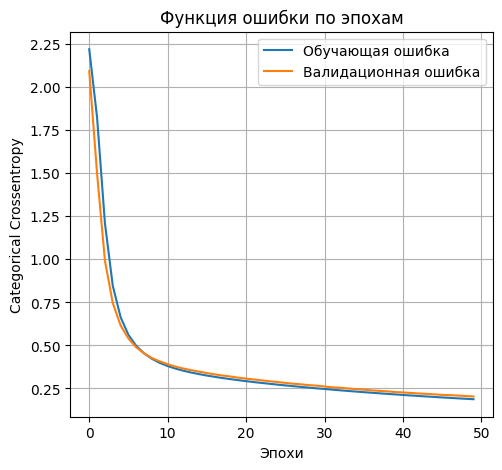

In [141]:
# Выводим график функции ошибки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_3l_100_100.history['loss'], label='Обучающая ошибка')
plt.plot(history_3l_100_100.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.grid(True)

In [142]:
scores_3l_100_100=model_3l_100_100.evaluate(X_test,y_test)
print('Lossontestdata:',scores_3l_100_100[0])
print('Accuracyontestdata:',scores_3l_100_100[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9488 - loss: 0.1810
Lossontestdata: 0.18787769973278046
Accuracyontestdata: 0.9467999935150146


In [171]:
import pandas as pd

data = {
    'Слои': [0, 1, 1, 1, 2, 2],
    'Нейроны 1': ['-', 100, 300, 500, 100, 100],
    'Нейроны 2': ['-', '-', '-', '-', 50, 100],
    'Метрика': [0.913100004196167, 0.9462000131607056, 0.9412000179290771, 0.9369999766349792, 0.9444000124931335, 0.9467999935150146]
}

df = pd.DataFrame(data)
df

Слои Нейроны 1 Нейроны 2  Метрика
0     0         -         -   0.9131
1     1       100         -   0.9462
2     1       300         -   0.9412
3     1       500         -   0.9370
4     2       100        50   0.9444
5     2       100       100   0.9468

In [143]:
# сохранение модели на диск, к примеру, в папку best_model
# В общем случае может быть указан произвольный путь
model_2l_100.save(filepath='best_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
NN output: [[3.0055828e-02 1.7918642e-06 1.0183058e-05 1.3000262e-04 2.2273003e-05
  9.6671683e-01 3.1997326e-05 6.5717955e-05 2.9293287e-03 3.6015103e-05]]


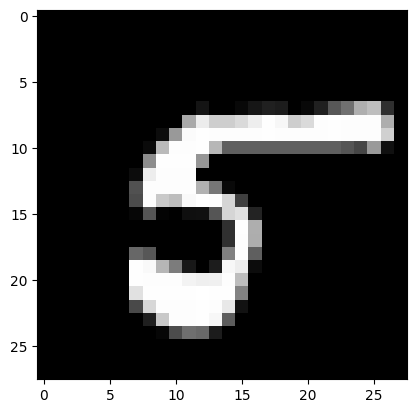

Real mark:  5
NN answer:  5


In [144]:
# вывод тестового изображения и результата распознавания
n = 333
result = model.predict(X_test[n:n+1])
print('NN output:', result)

plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
NN output: [[9.8050815e-01 5.7898621e-08 9.2301030e-05 8.2087971e-04 5.6250155e-06
  1.8371470e-02 9.3076023e-06 1.4318567e-04 2.3332947e-05 2.5768295e-05]]


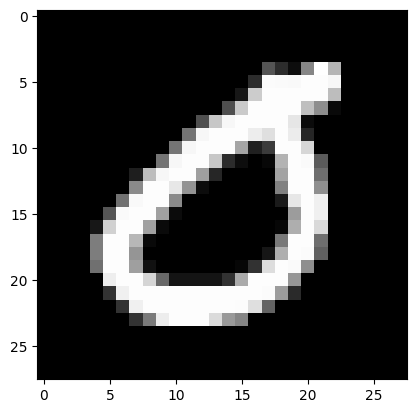

Real mark:  0
NN answer:  0


In [145]:
# вывод тестового изображения и результата распознавания
n = 555
result = model.predict(X_test[n:n+1])
print('NN output:', result)

plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


In [146]:
#загрузка собственного изображения
from PIL import Image
file_1_data = Image.open('1.png')
file_1_data = file_1_data.convert('L') #перевод в градации серого
test_1_img = np.array(file_1_data)

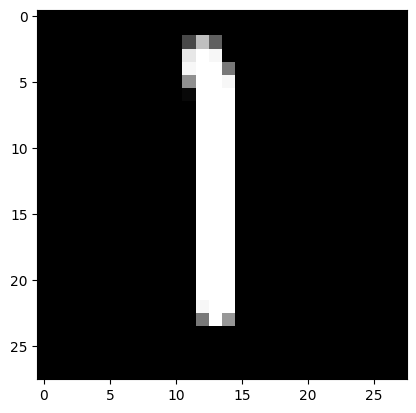

In [147]:
#вывод собственного изображения
plt.imshow(test_1_img, cmap=plt.get_cmap('gray'))
plt.show()

In [148]:
#предобработка
test_1_img = test_1_img / 255
test_1_img = test_1_img.reshape(1, num_pixels)

In [149]:
#распознавание
result_1 = model.predict(test_1_img)
print('I think it\'s', np.argmax(result_1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
I think it's 1


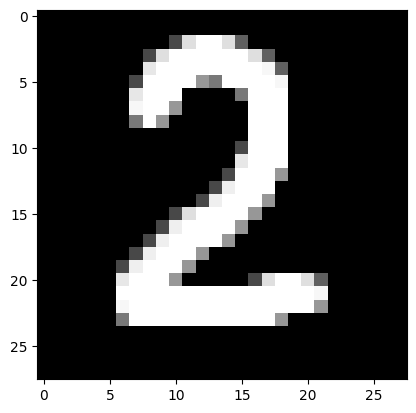

In [150]:
file_2_data = Image.open('2.png')
file_2_data = file_2_data.convert('L') #перевод в градации серого
test_2_img = np.array(file_2_data)

plt.imshow(test_2_img, cmap=plt.get_cmap('gray'))
plt.show()

In [151]:
test_2_img = test_2_img / 255
test_2_img = test_2_img.reshape(1, num_pixels)

result_2 = model.predict(test_2_img)
print('I think it\'s', np.argmax(result_2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
I think it's 2


Сеть не ошиблась и корректно распознала обе цифры на изображениях


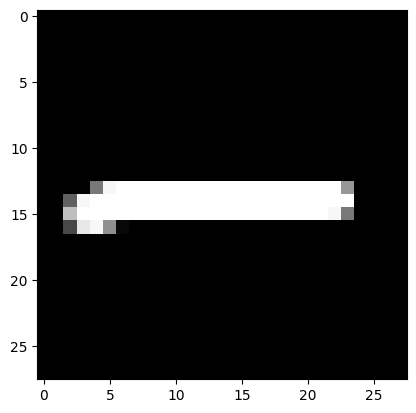

In [152]:
file_1_90_data = Image.open('1_90.png')
file_1_90_data = file_1_90_data.convert('L') #перевод в градации серого
test_1_90_img = np.array(file_1_90_data)

plt.imshow(test_1_90_img, cmap=plt.get_cmap('gray'))
plt.show()

In [153]:
test_1_90_img = test_1_90_img / 255
test_1_90_img = test_1_90_img.reshape(1, num_pixels)

result_1_90 = model.predict(test_1_90_img)
print('I think it\'s', np.argmax(result_1_90))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
I think it's 4


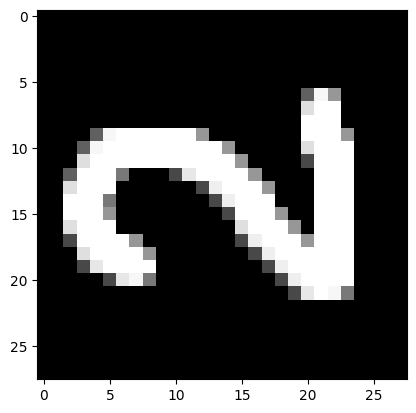

In [154]:
file_2_90_data = Image.open('2_90.png')
file_2_90_data = file_2_90_data.convert('L') #перевод в градации серого
test_2_90_img = np.array(file_2_90_data)

plt.imshow(test_2_90_img, cmap=plt.get_cmap('gray'))
plt.show()

In [155]:
test_2_90_img = test_2_90_img / 255
test_2_90_img = test_2_90_img.reshape(1, num_pixels)

result_2_90 = model.predict(test_2_90_img)
print('I think it\'s', np.argmax(result_2_90))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
I think it's 5


При повороте изображений сеть не распознала цифры правильно.
Так как она не обучалась на повернутых изображениях.